# ABaC Sentiment Analysis

The goal of this project is to perform a Sentiment Analysis from reviews to the Catalan restaurant [ABaC Restaurant](https://abacbarcelona.com/es/restaurante) from Jordi Cruz (a Spanish famous chef). The reviews are extracted from [TripAdvisor](https://www.tripadvisor.com/Restaurant_Review-g187497-d1074448-Reviews-ABaC-Barcelona_Catalonia.html) through Web scraping.

As most of the reviews are in Spanish and the pretrained models that will be used are set up in English, next step is to translate the reviews to English. To do so, Systran Translate helps us to perform that task, also using Web Scraping (as they do not have a free API).

Once every review is in English, to perform a Sentiment Analysis we will use transformers from [Hugging Face](https://huggingface.co/). Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation and more in over 100 languages. Its aim is to make cutting-edge NLP easier to use for everyone.

And after each review is classified into positive, negative and neutral, a simple Word Cloud will be performed to see what are customers most of the time talking about.

Which benefits can a Sentiment Analysis offer to a restaurant or to another business?

- **Improve Customer Service.** What does your customers really desire? What are their main complaints? And possiby reply to the bad reviews to find out more.

- **Develop Quality Products.** What do your customers wish your product had? Find out what is the main bottleneck of your product.

- **Improve Media Perceptions.** What's the overall feeling about your product? How do customers behave with your product and the one from your competitors?

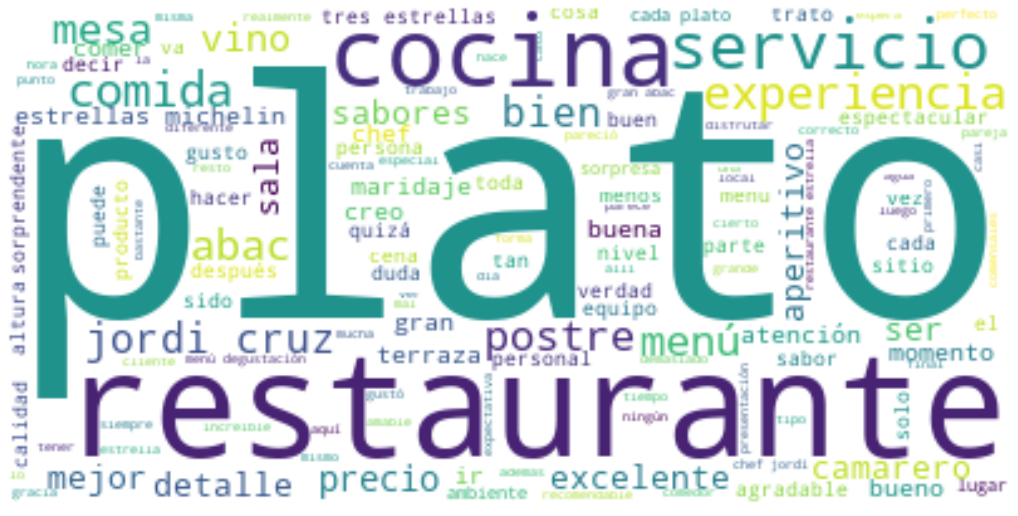

In [34]:
try: 
  wordcloud = WordCloud(background_color="white",max_font_size=200, max_words=10000).generate(all_reviews)

  # Display the generated image:
  fig, ax = plt.subplots(figsize=(18, 18))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")

  plt.show()
except:
  pass

In [35]:
!pip install transformers
!pip install langdetect
!pip install stanza
!pip install spacy-stanza

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [37]:
import nltk
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

spanish_stopwords = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
from wordcloud import WordCloud

In [39]:
from transformers import pipeline
sentiment_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [40]:
reviews = pd.read_csv('ABaC_reviews_translated.csv', index_col = 0)
reviews.head()

,body,lang,translation
0,Es la sensación que me ha transportado esta ex...,es,It is the feeling that this experience has car...
1,Es una gran experiencia y nos ha gustado mucho...,es,It's a great experience and we really liked it...
2,Comer en Abac es una experiencia vital que rec...,es,Eating at Abac is a vital experience that I re...
3,"Una pena.La comida sin pena ni gloria, de un 3...",es,"A pity.The food without pity or glory, of a 3 ..."
4,La comida nada sorprendente y más bien aburrid...,es,The food is not surprising and rather boring. ...


In [41]:
reviews = reviews[~reviews["translation"].isnull()]

In [42]:
sentiment_label = list()
sentiment_score = list()

In [43]:
sentiment_classifier('Today is a wonderful day')

[{'label': 'POSITIVE', 'score': 0.9998892545700073}]

In [44]:
for index, rev in reviews.iterrows():
  sentiment = sentiment_classifier(str(rev['translation']))[0]
  sentiment_label.append(sentiment['label'])
  sentiment_score.append(sentiment['score'])

In [45]:
reviews['sentiment_label'] = sentiment_label
reviews['sentiment_score'] = sentiment_score

In [46]:
reviews['sentiment_label'].value_counts()

POSITIVE    375
NEGATIVE    148
Name: sentiment_label, dtype: int64

In [47]:
negative_reviews = reviews[ (reviews['sentiment_label'] == 'NEGATIVE') & (reviews['sentiment_score'] >= 0.8) ]
neutral_reviews = reviews[ ((reviews['sentiment_label'] == 'NEGATIVE') & (reviews['sentiment_score'] < 0.8)) | 
                           ((reviews['sentiment_label'] == 'POSITIVE') & (reviews['sentiment_score'] < 0.8)) ]
positive_reviews = reviews[ (reviews['sentiment_label'] == 'POSITIVE') & (reviews['sentiment_score'] >= 0.8) ]

In [48]:
punctuation = ['.',":","...",",","?","¿","!","/"]
more_stopwords = ['si','así','dos','mas','el','aunque']
stopwords = spanish_stopwords + punctuation
stopwords = stopwords + more_stopwords

# General Word cloud

In [49]:
all_reviews = str()
for rev in reviews['body']:
  tokens = word_tokenize(rev)
  tokens_wout_sw = [word.lower() for word in tokens if not word.lower() in stopwords]
  for token in tokens_wout_sw:
    all_reviews = all_reviews + ' ' + str(token)

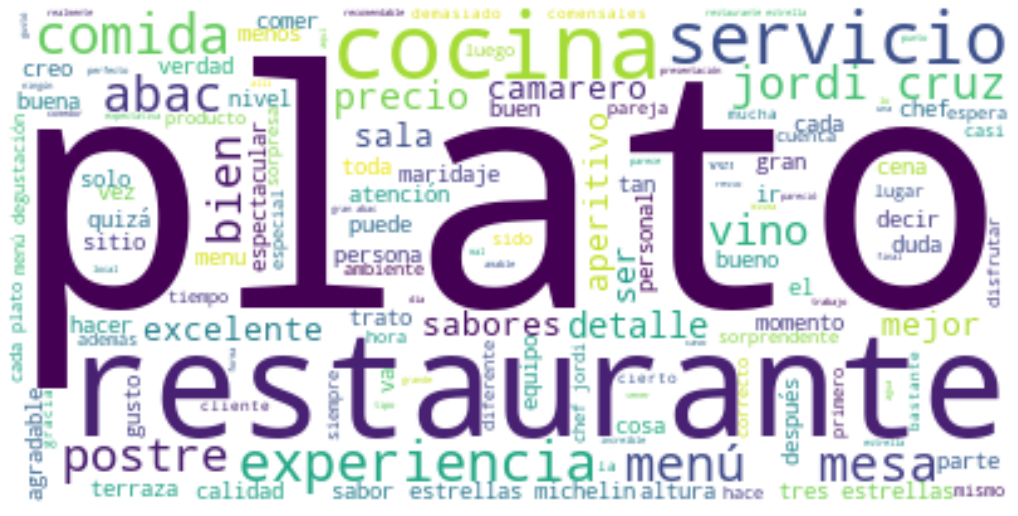

In [50]:
wordcloud = WordCloud(background_color="white",max_font_size=200, max_words=10000).generate(all_reviews)

# Display the generated image:
fig, ax = plt.subplots(figsize=(18, 18))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

plt.show()

# Negative reviews Word Cloud

In [51]:
len(negative_reviews)

135

In [52]:
negative_reviews['sentiment_score'].describe()

count    135.000000
mean       0.980377
std        0.031356
min        0.826572
25%        0.977159
50%        0.992980
75%        0.997673
max        0.999815
Name: sentiment_score, dtype: float64

In [53]:
neg_reviews = str()
for rev in negative_reviews['body']:
  tokens = word_tokenize(rev)
  tokens_wout_sw = [word.lower() for word in tokens if not word.lower() in stopwords]
  for token in tokens_wout_sw:
    neg_reviews = neg_reviews + ' ' + str(token)

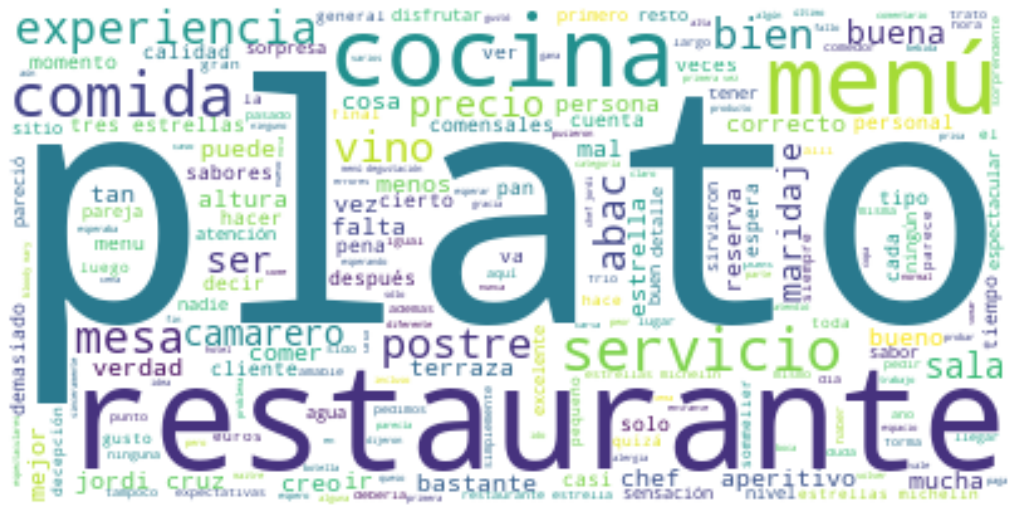

In [54]:
wordcloud = WordCloud(background_color="white",max_font_size=200, max_words=5000).generate(neg_reviews)

# Display the generated image:
fig, ax = plt.subplots(figsize=(18, 18))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

plt.show()

# Positive reviews Word Cloud

In [55]:
len(positive_reviews)

365

In [56]:
positive_reviews['sentiment_score'].describe()

count    365.000000
mean       0.993448
std        0.023353
min        0.806870
25%        0.997618
50%        0.999610
75%        0.999840
max        0.999892
Name: sentiment_score, dtype: float64

In [57]:
pos_reviews = str()
for rev in positive_reviews['body']:
  tokens = word_tokenize(rev)
  tokens_wout_sw = [word.lower() for word in tokens if not word.lower() in stopwords]
  for token in tokens_wout_sw:
    pos_reviews = neg_reviews + ' ' + str(token)

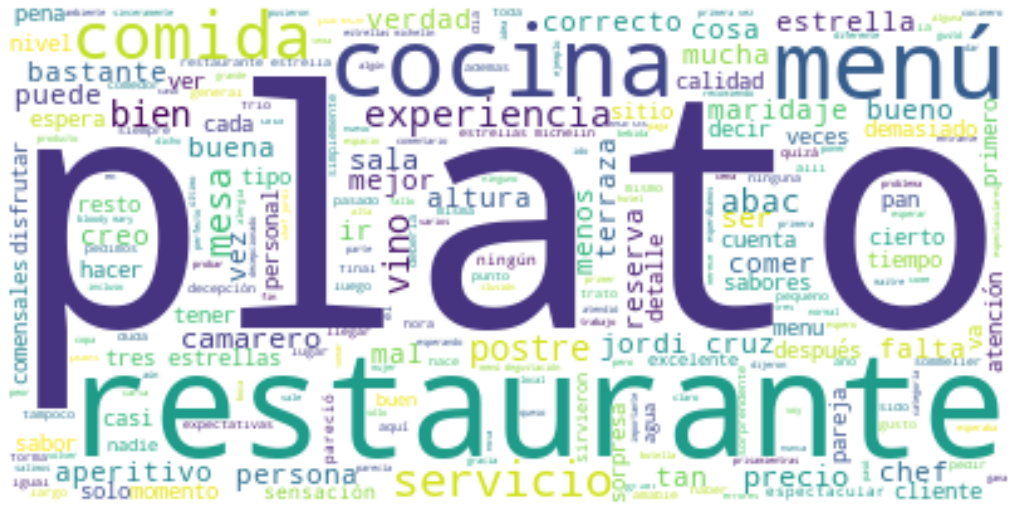

In [58]:
wordcloud = WordCloud(background_color="white",max_font_size=200, max_words=5000).generate(pos_reviews)

# Display the generated image:
fig, ax = plt.subplots(figsize=(18, 18))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

plt.show()

# Neutral reviews Word Cloud

In [59]:
len(neutral_reviews)

23

In [60]:
neutral_reviews['sentiment_score'].describe()

count    23.000000
mean      0.643143
std       0.095056
min       0.508000
25%       0.555151
50%       0.638877
75%       0.708234
max       0.795924
Name: sentiment_score, dtype: float64

In [61]:
neu_reviews = str()
for rev in neutral_reviews['body']:
  tokens = word_tokenize(rev)
  tokens_wout_sw = [word.lower() for word in tokens if not word.lower() in stopwords]
  for token in tokens_wout_sw:
    neu_reviews = neu_reviews + ' ' + str(token)

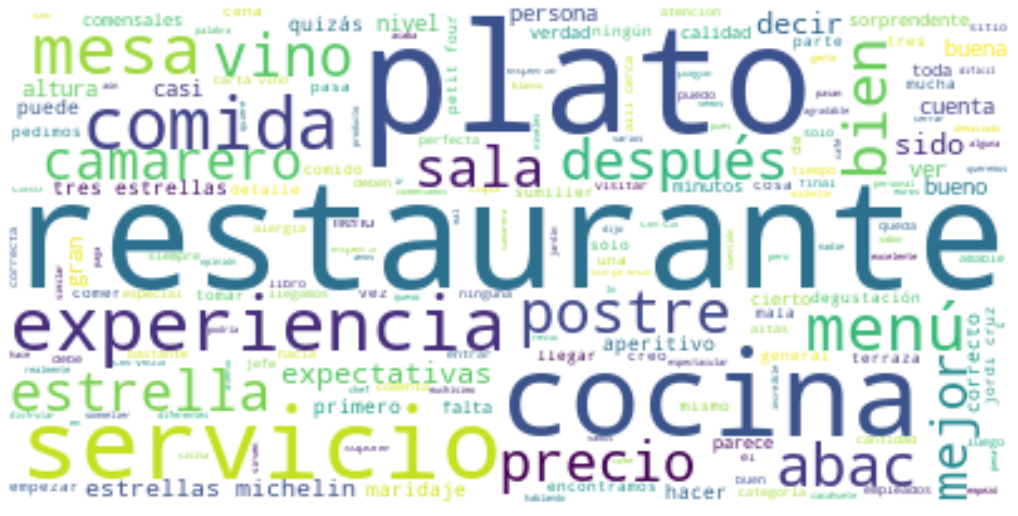

In [62]:
wordcloud = WordCloud(background_color="white",max_font_size=200, max_words=5000).generate(neu_reviews)

# Display the generated image:
fig, ax = plt.subplots(figsize=(18, 18))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

plt.show()